In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
home_directory_path = os.path.expanduser('~')
sys.path.append(home_directory_path +'/utils')
from acquire_utils import get_connection
from prepare_utils import identify_cols_with_white_space

1. Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.

- In MySQL, I can see 'Single Family Residential' properties are where `zillow.properties_2017.propertylandusetypeid =  261`

In [23]:
df = pd.read_sql('''SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet,
                            taxvaluedollarcnt, yearbuilt, taxamount, fips 
                    FROM properties_2017 as p
                    WHERE p.propertylandusetypeid = 261;''',
                   get_connection('zillow'))

In [24]:
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


None

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


First I want to **rename the columns:**

In [25]:
df.columns = ['bedrooms', 'bathrooms', 'sqft', 'property_value',
              'year_built', 'property_tax', 'county']

I want to inspect values and their counts and note any oddities and insights (not EDA)

In [26]:
for col in df.columns:
    display(df[col].value_counts())
    print('-'*35)

3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bedrooms, dtype: int64

-----------------------------------


2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13027
6.00      10747
5.50       6217
7.00       4394
8.00       1692
6.50       1333
9.00        713
7.50        384
10.00       325
11.00       146
8.50        110
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathrooms, dtype: int64

-----------------------------------


1200.0     5195
1080.0     4389
1120.0     4362
1400.0     3833
1440.0     3690
           ... 
10613.0       1
9360.0        1
10238.0       1
13748.0       1
24920.0       1
Name: sqft, Length: 10580, dtype: int64

-----------------------------------


450000.0     821
500000.0     779
400000.0     729
430000.0     690
440000.0     685
            ... 
3713490.0      1
1314828.0      1
1166747.0      1
1289528.0      1
536061.0       1
Name: property_value, Length: 592269, dtype: int64

-----------------------------------


1955.0    84405
1950.0    71693
1954.0    69163
1953.0    62342
1956.0    61942
          ...  
1823.0        1
1855.0        1
1879.0        1
1840.0        1
1874.0        1
Name: year_built, Length: 153, dtype: int64

-----------------------------------


345.72      172
344.18       77
343.52       75
285.30       67
49.18        46
           ... 
10115.62      1
4200.22       1
5609.30       1
4037.26       1
13494.52      1
Name: property_tax, Length: 918838, dtype: int64

-----------------------------------


6037.0    1431811
6059.0     555077
6111.0     165975
Name: county, dtype: int64

-----------------------------------


NOTES:

- 3 FIPS (county) codes: 6037 (LA), 6059 (Orange), 6111 (Ventura)
- Weird bedroom values (with counts): 0 (13187), >6 (6407)
    - MVP approach: use values between 1 and 6 (inclusive)
- Weird bathroom values (with counts): 0 (13027), 0.5 (16), 1.75 (3), >5 (26319)
    - MVP approach: use values between 1 and 6 (inclusive), exluding the 3 with 1.75

Looking for odd year values (not min, max, average, etc.): None, other than some early 1800's outliers. Will keep for now

In [27]:
sorted(df['year_built'].unique())

[nan,
 1801.0,
 1807.0,
 1812.0,
 1823.0,
 1833.0,
 1840.0,
 1855.0,
 1862.0,
 1865.0,
 1870.0,
 1874.0,
 1875.0,
 1876.0,
 1877.0,
 1878.0,
 1879.0,
 1880.0,
 1881.0,
 1882.0,
 1883.0,
 1884.0,
 1885.0,
 1886.0,
 1887.0,
 1888.0,
 1889.0,
 1890.0,
 1891.0,
 1892.0,
 1893.0,
 1894.0,
 1895.0,
 1896.0,
 1897.0,
 1898.0,
 1899.0,
 1900.0,
 1901.0,
 1902.0,
 1903.0,
 1904.0,
 1905.0,
 1906.0,
 1907.0,
 1908.0,
 1909.0,
 1910.0,
 1911.0,
 1912.0,
 1913.0,
 1914.0,
 1915.0,
 1916.0,
 1917.0,
 1918.0,
 1919.0,
 1920.0,
 1921.0,
 1922.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 197

**Filtering homes with 1-6 bathrooms and 1-6 bedrooms** (MVP approaches stated above)

In [28]:
# 1 to 6 bedrooms
df = df[(df['bedrooms'] >= 1) & (df['bedrooms'] <= 6)]
# 1 to 6 bathrooms, not including 1.75
df = df[(df['bathrooms'] >= 1) & (df['bathrooms'] <= 6) 
        & (df['bathrooms'] != 1.75)]
df

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

**Inspect and Handle Missing Values**

Implicit: None

In [29]:
identify_cols_with_white_space(df)

[]

Explicit:

- `bedrooms` :                        0
- `bathrooms` :                       0
- `sqft` :                          210
- `property_value` :                105 
- `year_built` :                   1233     
- `property_tax` :                 2453     
- `count` :                           0

In [30]:
display(df.isnull().sum())
display(df.isnull().sum()/(len(df)))

bedrooms             0
bathrooms            0
sqft               210
property_value     105
year_built        1233
property_tax      2453
county               0
dtype: int64

bedrooms          0.000000
bathrooms         0.000000
sqft              0.000099
property_value    0.000049
year_built        0.000580
property_tax      0.001154
county            0.000000
dtype: float64

Handle:
- I will drop rows with missing values in any columns since these rows account for <1% of our data.

In [31]:
df = df.dropna()
print(len(df))
df.isnull().sum()

2121279


bedrooms          0
bathrooms         0
sqft              0
property_value    0
year_built        0
property_tax      0
county            0
dtype: int64

**Inspecting and Handling Duplicates**

In [32]:
df.duplicated().sum()

9881

In [37]:
df[df.duplicated()].sort_values(by=list(df.columns))

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
1769689,1.0,1.0,364.0,475330.0,1914.0,3548.13,6037.0
1329994,1.0,1.0,432.0,40474.0,1924.0,678.31,6037.0
2128405,1.0,1.0,456.0,39227.0,1946.0,772.56,6059.0
647056,1.0,1.0,516.0,153101.0,1948.0,1939.37,6037.0
1060947,1.0,1.0,546.0,46092.0,1923.0,743.14,6037.0
...,...,...,...,...,...,...,...
1829964,6.0,5.0,3847.0,366000.0,2006.0,5352.43,6037.0
301075,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0
925717,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0
1442469,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0


In [34]:
df[df.duplicated(keep='first')].sort_values(by=list(df.columns))

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
1769689,1.0,1.0,364.0,475330.0,1914.0,3548.13,6037.0
1329994,1.0,1.0,432.0,40474.0,1924.0,678.31,6037.0
2128405,1.0,1.0,456.0,39227.0,1946.0,772.56,6059.0
647056,1.0,1.0,516.0,153101.0,1948.0,1939.37,6037.0
1060947,1.0,1.0,546.0,46092.0,1923.0,743.14,6037.0
...,...,...,...,...,...,...,...
1829964,6.0,5.0,3847.0,366000.0,2006.0,5352.43,6037.0
301075,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0
925717,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0
1442469,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0


In [35]:
df[df.duplicated(keep='last')].sort_values(by=list(df.columns))

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
25549,1.0,1.0,364.0,475330.0,1914.0,3548.13,6037.0
920849,1.0,1.0,432.0,40474.0,1924.0,678.31,6037.0
384641,1.0,1.0,456.0,39227.0,1946.0,772.56,6059.0
237910,1.0,1.0,516.0,153101.0,1948.0,1939.37,6037.0
651842,1.0,1.0,546.0,46092.0,1923.0,743.14,6037.0
...,...,...,...,...,...,...,...
1184046,6.0,5.0,3847.0,366000.0,2006.0,5352.43,6037.0
172024,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0
301075,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0
925717,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0


In [36]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
25549,1.0,1.0,364.0,475330.0,1914.0,3548.13,6037.0
1769689,1.0,1.0,364.0,475330.0,1914.0,3548.13,6037.0
920849,1.0,1.0,432.0,40474.0,1924.0,678.31,6037.0
1329994,1.0,1.0,432.0,40474.0,1924.0,678.31,6037.0
384641,1.0,1.0,456.0,39227.0,1946.0,772.56,6059.0
...,...,...,...,...,...,...,...
301075,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0
925717,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0
1442469,6.0,5.5,4041.0,1517730.0,2005.0,21096.20,6059.0
796437,6.0,5.5,4041.0,1587088.0,2005.0,21923.08,6059.0


I will drop duplicates (and keep first, default)

In [14]:
df = df.drop_duplicates()

**Handling outliers**

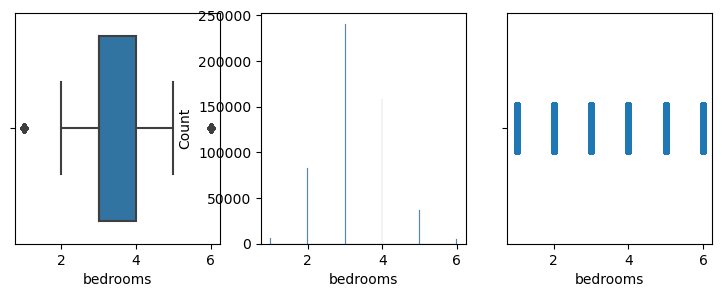

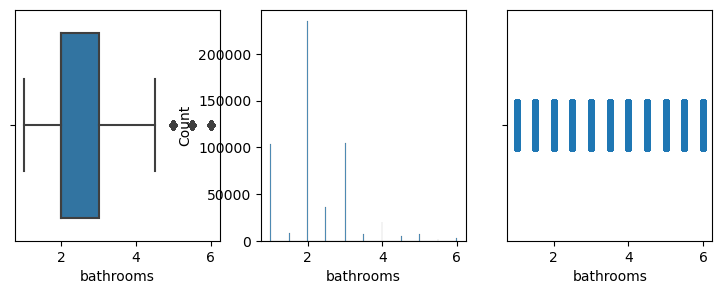

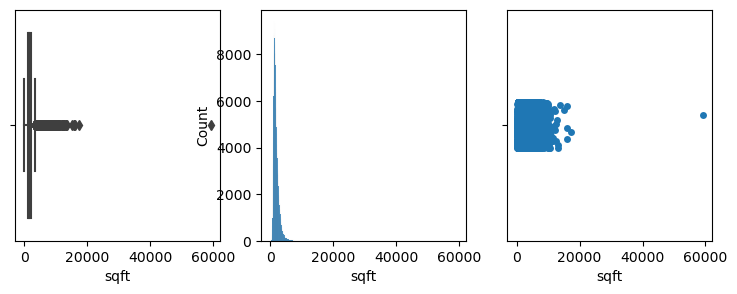

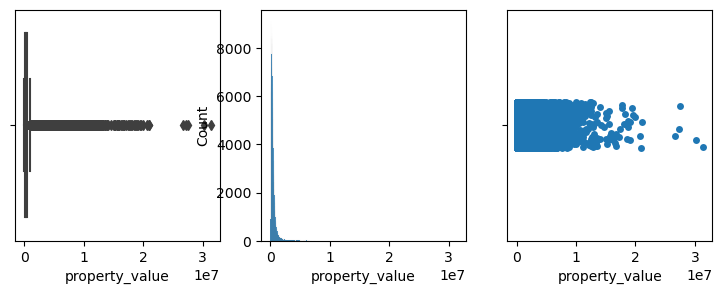

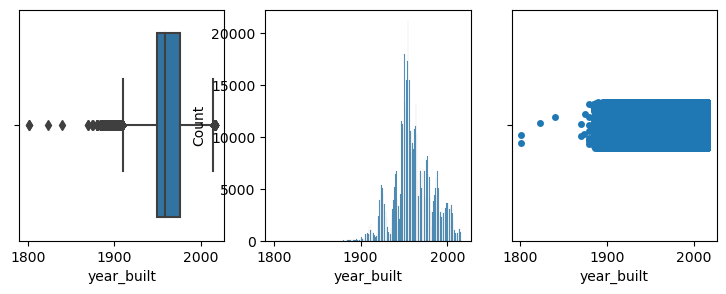

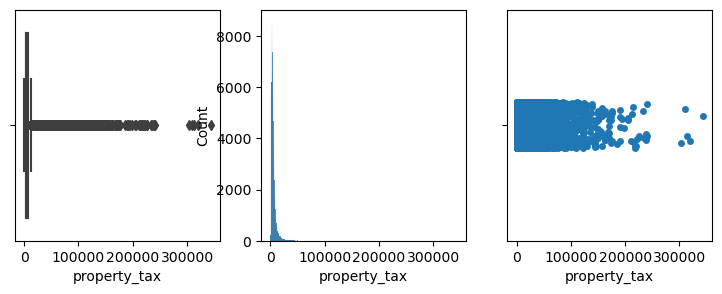

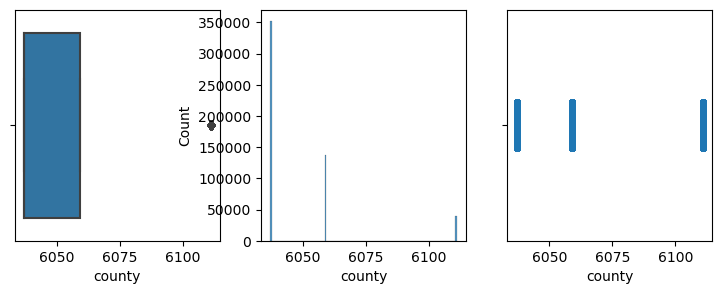

In [44]:
for col in df.columns:
    fig, axes = plt.subplots(1,3,figsize=(9, 3))
    sns.boxplot(data=df.sample(frac=0.25, random_state=125),
                x=col, ax=axes[0])
    sns.histplot(data=df.sample(frac=0.25, random_state=125),
                 x=col, ax=axes[1])
    sns.stripplot(data=df.sample(frac=0.25, random_state=125),
                  x=col, ax=axes[2])

Note:
- Outliers to remove:
    - sqft > 8,000
    - year_built < 1900
    - property_tax > 50,000

Removing Outliers:

In [49]:
df = df[(df['sqft'] <= 8_000) &
        (df['year_built'] >= 1900) &
        (df['property_tax'] <= 50_000)]

**Give appropriate values for each column:**
- bedrooms, sqft, property_value, and year_built should be integers
- county should be object and encoded for modeling (after exploration)
- bathrooms and property_tax will stay floats for now

In [ ]:
# seeing which columns have only whole number floats
for col in df.columns:
    print(col + ': ', end='') 
    print((df[col] % 1 == 0).all())

In [ ]:
df[['bedrooms', 'sqft', 'property_value', 'year_built']] =\
    df[['bedrooms', 'sqft', 'property_value', 'year_built']].astype(int)
df['county'] = df['county'].replace({6037: 'LA', 6059: 'Orange', 6111: 'Ventura'})

df

Check column data types

In [ ]:
display(df.info())
for col in df.columns:
    display(df[col].value_counts())
    print('-'*35)

3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [ ]:
def wrangle_zillow_data():
    '''
    Acquire zillow data from MySQL database
    Prepare data by handling missing values and duplicates
    Save wrangled data into a csv
    '''
    # acquire MySQL data
    df = pd.read_sql('''SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet,
                                taxvaluedollarcnt, yearbuilt, taxamount, fips 
                        FROM properties_2017 as p
                        WHERE p.propertylandusetypeid = 261;''',
                       get_connection('zillow'))
    
    # rename columns
    df.columns = ['bedrooms', 'bathrooms', 'sqft', 'property_value',
                  'year_built', 'property_tax', 'county']
    
    # filtering data to have "normal" number of bedrooms and bathrooms
    # 1 to 6 bedrooms
    df = df[(df['bedrooms'] >= 1) & (df['bedrooms'] <= 6)]
    # 1 to 6 bathrooms, not including 1.75
    df = df[(df['bathrooms'] >= 1) & (df['bathrooms'] <= 6) 
            & (df['bathrooms'] != 1.75)]
    
    # handle missing values
    df = df.dropna()
    
    # drop duplicates
    df = df.drop_duplicates()
    
    # Removing outliers
    df = df[(df['sqft'] <= 8_000) &
        (df['year_built'] >= 1900) &
        (df['property_tax'] <= 50_000)]
    
    # giving data appropriate types and values
    df[['bedrooms', 'sqft', 'property_value', 'year_built']] = \
        df[['bedrooms', 'sqft', 'property_value', 'year_built']].astype(int)
    # assigning county codes their respective names
    df['county'] = df['county'].replace({6037: 'LA', 6059: 'Orange', 6111: 'Ventura'})
    
    # cache data
    df.to_csv('data/zillow_data.csv', index=False)
    
    return df